# Prerequisites 
* Files ../../datasets/V1HPC_spks_CQuinn_(pre/post/novel).feather -- can be generated using notebook (`preprocessing-notebooks/Explorating data + preprocessing .ipynb`)
* DI analysis on the dataset V1HPC -- pre/post/novel 

In [1]:
import glob 
import sys 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib
import pandas as pd 


sys.path.append('../notebooks/lasso-method/')
sys.path.append('../code/')
sys.path.append('./')
from utils import * 

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


os.makedirs('output', exist_ok=True)

## V1HPC 

In [2]:


pre, post, novel = ( pd.read_feather('../../datasets/V1HPC_spks_CQuinn_pre.feather'), 
                   pd.read_feather('../../datasets/V1HPC_spks_CQuinn_post.feather'),
                   pd.read_feather('../../datasets/V1HPC_spks_CQuinn_novel.feather'),) 
pre_units, post_units, novel_units = pre['id'].unique(), post['id'].unique(), novel['id'].unique()
len(pre_units), len(post_units), len(novel_units)

(399, 595, 628)

In [3]:
# load files  -- requires DI analysis results 
pre_files = glob.glob('../../V1HPC/output_stimuli_0/DI_values/V1HPC_spks_CQuinn_pre/0/500_1500/lasso_0.5/*')
post_files = glob.glob('../../V1HPC/output_stimuli_0/DI_values/V1HPC_spks_CQuinn_post/0/500_1500/lasso_0.5/*')
novel_files = glob.glob('../../V1HPC/output_stimuli_0/DI_values/V1HPC_spks_CQuinn_novel/0/500_1500/lasso_0.5/*')

len(pre_files), len(post_files), len(novel_files)

(399, 595, 628)

## pre vs post 

Issues summary {'negative_di': 138, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 186, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 138, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 186, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 138, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 186, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 138, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 186, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
pre 123 hippo hippo
pre 71 hippo v1
pre 81 v1 hippo
pre 103 v1 v1
post 211 hippo hippo
post 95 hippo v1
post 138 v1 hippo
post 135 v1 v1

From hippo to hippo

From hippo to v1

From v1 to hippo

From v1 to v1

From hippo to hippo

From hippo to v1

From v1 to hipp

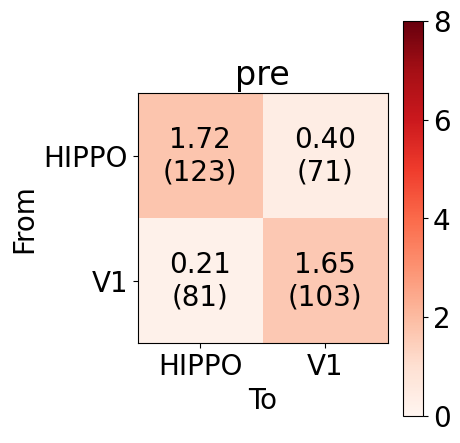

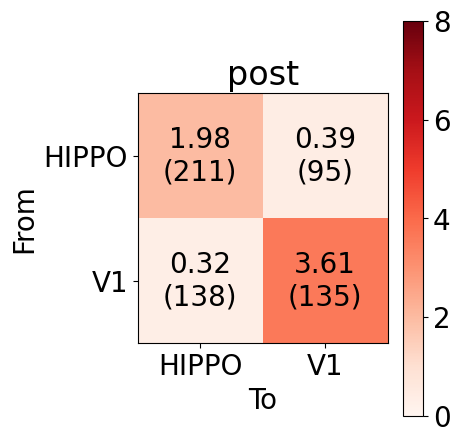

In [4]:
import analysis_utils
from all_stimuli_plots import read_plot_data

AREAS = ['hippo', 'v1']
STIMULI = [0]
STIMULUS_ID = 0

data = read_plot_data('', pre_files,post_files, areas=AREAS, stimuli=STIMULI)

for pre_post in ['pre', 'post']:
    for a1 in AREAS:
        for a2 in AREAS:
            print(pre_post, len(data['raw'][a1][a2][pre_post][STIMULUS_ID]), a1, a2)
            


plot_per_training(data, 'pre', training='pre', areas=AREAS, stimulus_id=0)
plt.tight_layout()
plt.savefig('output/V1HPC_pre.pdf', dpi=300)

plt.figure()

plot_per_training(data, 'post', training='post', areas=AREAS, stimulus_id=0)
plt.tight_layout()
plt.savefig('output/V1HPC_post.pdf', dpi=300)



From hippo to hippo
true_diff  [[0.26375007]]
Proportion |Pre| / (|Pre| + |Post|) 0.36826347305389223
Using 1000000 runs

From hippo to v1
true_diff  [[-0.00380396]]
Proportion |Pre| / (|Pre| + |Post|) 0.42771084337349397
Using 1000000 runs

From v1 to hippo
true_diff  [[0.11166378]]
Proportion |Pre| / (|Pre| + |Post|) 0.3698630136986301
Using 1000000 runs

From v1 to v1
true_diff  [[1.95297732]]
Proportion |Pre| / (|Pre| + |Post|) 0.4327731092436975
Using 1000000 runs
Significant - pre - 103, post - 135 with significance value 3.3e-05
pvals [7.62468e-01 9.54868e-01 3.67400e-01 1.32000e-04]


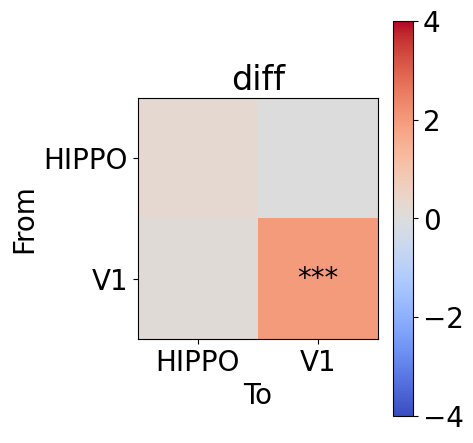

In [6]:
plot(data, 'diff', corrected=True, areas=AREAS, stimulus_id=0, max_=4., n_runs=1_000_000)
plt.tight_layout()
# plt.savefig('output/V1HPC_pre_post_diff.pdf', dpi=300)


In [9]:
# data 